<a href="https://colab.research.google.com/github/macruga/predictive-analytics/blob/main/kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load dataset

In [5]:
df_kyphosis = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/kyphosis.csv')

In [11]:
df_kyphosis.sample(10)

,Kyphosis,Age,Number,Start
63,absent,118,3,16
64,absent,118,4,16
73,absent,206,4,10
69,absent,15,5,16
66,absent,195,2,17
55,absent,72,5,15
11,absent,148,3,16
50,absent,68,5,10
38,absent,20,6,9
26,absent,8,3,6


In [7]:
df_kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## EDA

### Age in months

In [8]:
df_kyphosis.Kyphosis.unique()

array(['absent', 'present'], dtype=object)

In [14]:
df_kyphosis.Number.value_counts() # values between 2 and 10

3     23
4     18
5     17
2     12
7      5
6      4
9      1
10     1
Name: Number, dtype: int64

In [15]:
df_kyphosis.Start.value_counts() # values between 1 and 18

16    17
13    12
15     7
14     5
1      5
12     5
17     4
9      4
6      4
10     4
5      3
3      3
11     3
2      2
8      2
18     1
Name: Start, dtype: int64

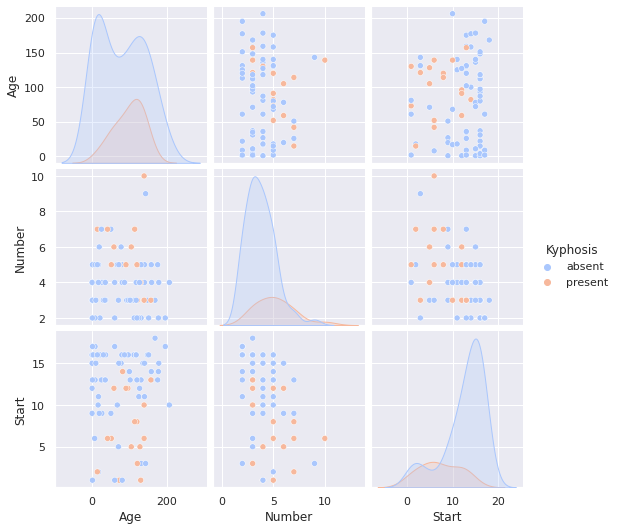

In [9]:
sns.pairplot(df_kyphosis,hue='Kyphosis',palette='coolwarm')

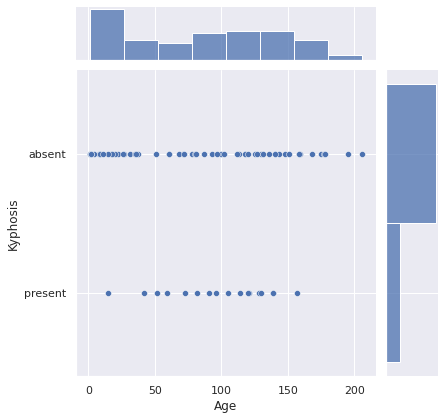

In [12]:
sns.jointplot(x='Age',y='Kyphosis',data=df_kyphosis)

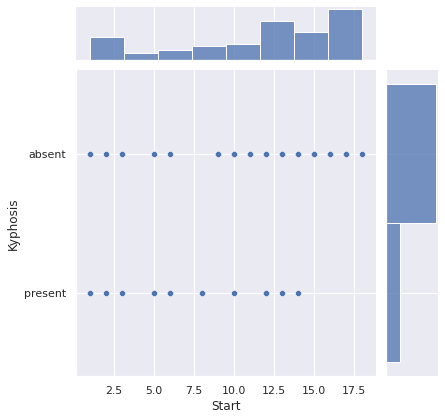

In [13]:
sns.jointplot(x='Start',y='Kyphosis',data=df_kyphosis)

## Logistic regression

In [16]:
# Split data

from sklearn.model_selection import train_test_split

In [17]:
X = df_kyphosis[['Age','Number','Start']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,df_kyphosis['Kyphosis'], test_size=0.30)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        20
     present       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



In [52]:
print('The Prediction Acuracy of the model is ', logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Absent", sum(pp!=0))
print("Present", sum(pp==0))

The Prediction Acuracy of the model is  0.88
Absent 25
Present 0


## KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [57]:
pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(y_test,pred))

[[18  2]
 [ 4  1]]


In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25

